#2017 DFW Airport Flights Delay Prediction
## By Mohamed Elsaied, Sean Ji, Yan Li, Michael Xu
# 1.Buisness Understanding
          Traveling by flights have been a common type of transportation; however, delays has been one of the most concerned problem with passengers. Our nearest airport, Dallas-Fort Worth International Airport (DFW), is the second largest airport in the U.S. both by size of the land and the airline hub, and it is the fourth busiest U.S. airport based on the number of passengers enplaned in 2017. However, DFW could not make itself a pioneer at the on-time ratio. According to Statista.com, DFW was ranked No.10 on the most punctual airport by on-time arrival, beaten by the champion, Minneapolis–Saint Paul International, approximately 4%. 
          As citizens in the Dallas-Fort Worth metroplex and frequent flyers at DFW, we have seen the development of the metroplex, as well as the potential demand of service growth of the airport. Thus, we would like to provide prediction of the flight delay given certain features to help improving the punctuality of arrivals at the DFW airport. We believe our analytics will favor American Airlines who headquarters and owns its largest hub at DFW airport, so they are able to provide more punctual services to its passengers in a more targeted manner, and to embrace more potential travellers to fly. Additionally, our predictions could earn more recognition for the American Airlines official site, by attracting more users to book tickets directly through American Airlines, instead from other third-party agencies.
    
## 1.1 The Data Set
          The dataset come from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics, which tracks the on-time performance of domestic flights operated by large air carriers. The retrieved dataset contains only the domestic flight information which arrived at the DFW airport, including delays and cancellations. There are 181,208 observations and 38 features, such as the time of flight, airline code, and arrival cities, etc. We have a combination of nominal (qualitative) and ratio (quantitative) features. 
    
## 1.2 Measure Of Success
          Our predictions can be an alternative to the on-time rate provided by American Airlines official site, which is based on their historical data and the average of on-time rate. Our predictions aim to predict whether a flight will be delayed (binary decision). Since a flight delay is considered as a flight arriving at the gate over 15 minutes after the scheduled time of arrival, we will respect this industry practice and to apply such standard to our predictions. The goal of the predictions is to achieve a 95% rate of success in test data set.
   





###References:
* https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time
* https://www.statista.com/statistics/185679/passengers-boarded-at-the-leading-25-us-airports/
* https://www.statista.com/statistics/806848/punctuality-of-major-airports-united-states/

# 2 Data Understanding

## 2.1 Data and python module loading

Loading the necessary python modules and the dataset

In [2]:
# Load the flight dataset and useful python module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as mn
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:/Users/micha/Desktop/SMU School Stuff/2018 Fall/flights2017.csv') 

# Show the name of each column 
df.head()

# Based info about each column type (object, integer, or float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984923 entries, 0 to 984922
Data columns (total 38 columns):
Unnamed: 0             984923 non-null int64
QUARTER                984923 non-null int64
MONTH                  984923 non-null int64
DAY_OF_MONTH           984923 non-null int64
DAY_OF_WEEK            984923 non-null int64
FL_DATE                984923 non-null object
UNIQUE_CARRIER         984923 non-null object
AIRLINE_ID             984923 non-null int64
TAIL_NUM               979808 non-null object
FL_NUM                 984923 non-null int64
ORIGIN_AIRPORT_ID      984923 non-null int64
ORIGIN_CITY_NAME       984923 non-null object
ORIGIN_STATE_NM        984923 non-null object
DEST_AIRPORT_ID        984923 non-null int64
DEST_CITY_NAME         984923 non-null object
DEST_STATE_NM          984923 non-null object
CRS_DEP_TIME           984923 non-null int64
DEP_TIME               968944 non-null float64
DEP_DELAY              968937 non-null float64
DEP_DELAY_NEW          

## 2.2 Data Cleaning

Since we are only interested in incoming flights to DFW airport, we subset the data where DEST_CITY_NAME is Dallas/Fort Worth.

In [3]:
# Subset flights which has Dallas as their final destination
df_dfw = df[df['DEST_CITY_NAME']=='Dallas/Fort Worth, TX']

# Convert flight date to a date variable
df_dfw['FL_DATE'] = pd.to_datetime(df_dfw['FL_DATE'])

#The general info for the cleared dataset
print('Fights Data Dimensions:', df.shape)
print(df_dfw.info())

Fights Data Dimensions: (984923, 38)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 181208 entries, 1 to 984915
Data columns (total 38 columns):
Unnamed: 0             181208 non-null int64
QUARTER                181208 non-null int64
MONTH                  181208 non-null int64
DAY_OF_MONTH           181208 non-null int64
DAY_OF_WEEK            181208 non-null int64
FL_DATE                181208 non-null datetime64[ns]
UNIQUE_CARRIER         181208 non-null object
AIRLINE_ID             181208 non-null int64
TAIL_NUM               181032 non-null object
FL_NUM                 181208 non-null int64
ORIGIN_AIRPORT_ID      181208 non-null int64
ORIGIN_CITY_NAME       181208 non-null object
ORIGIN_STATE_NM        181208 non-null object
DEST_AIRPORT_ID        181208 non-null int64
DEST_CITY_NAME         181208 non-null object
DEST_STATE_NM          181208 non-null object
CRS_DEP_TIME           181208 non-null int64
DEP_TIME               179218 non-null float64
DEP_DELAY              17

## 2.3  Data Attirbute Defination

In [3]:
#Present the data description
description_table = pd.DataFrame()
description_table['Column Name'] = df_dfw.columns
description_table['Description'] = ['Label of Observation',
                                    'Quarter (1-4)', 
                                    'Month (1-12)',
                                    'Day of Month',
                                    'Day of Week',
                                    'Flight Date',
                                    'Airline 2-Letter Codes',
                                    'An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.',
                                    'Tail number of aircraft', 
                                    'Flight number', 
                                    'Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.', 
                                    'Origin Airport, City Name',
                                    'Origin Airport, State Name',
                                    'Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.',
                                    'Destination Airport, City Name',
                                    'Destination Airport, State Name',
                                    'Scheduled Departure Time (local time: hhmm)',
                                    'Actual Departure Time (local time: hhmm)',
                                    'Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.',
                                    'Difference in minutes between scheduled and actual departure time. Early departures set to 0.',
                                    'Departure Delay Indicator, 15 Minutes or More (1=Yes)',
                                    'Taxi Out Time, in Minutes',
                                    'Taxi In Time, in Minutes',
                                    'Scheduled Arrival Time (local time: hhmm)',
                                    'Actual Arrival Time (local time: hhmm)',
                                    'Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.',
                                    'Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.',
                                    'Arrival Delay Indicator, 15 Minutes or More (1=Yes)',
                                    'Cancelled Flight Indicator (1=Yes)',
                                    'Specifies The Reason For Cancellation',
                                    'Diverted Flight Indicator (1=Yes)',
                                    'Flight Time, in Minutes',
                                    'Distance between airports (miles)',
                                    'Carrier Delay, in Minutes',
                                    'Weather Delay, in Minutes',
                                    'National Air System Delay, in Minutes',
                                    'Security Delay, in Minutes',
                                    'Late Aircraft Delay, in Minutes'
                                   ]
# Data type
description_table['Attributes'] = ['Nominal',
                                   'Interval',
                                   'Interval',
                                   'Interval',
                                   'Interval',
                                   'Interval',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Nominal',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ordinal',
                                   'Nominal',
                                   'Ordinal',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio',
                                   'Ratio']


description_table

,Column Name,Description,Attributes
0,Unnamed: 0,Label of Observation,Nominal
1,QUARTER,Quarter (1-4),Interval
2,MONTH,Month (1-12),Interval
3,DAY_OF_MONTH,Day of Month,Interval
4,DAY_OF_WEEK,Day of Week,Interval
5,FL_DATE,Flight Date,Interval
6,UNIQUE_CARRIER,Airline 2-Letter Codes,Nominal
7,AIRLINE_ID,An identification number assigned by US DOT to...,Nominal
8,TAIL_NUM,Tail number of aircraft,Nominal
9,FL_NUM,Flight number,Nominal


We need to install missingno module since it's not working on google colab

##  2.4 Data Quality Verification

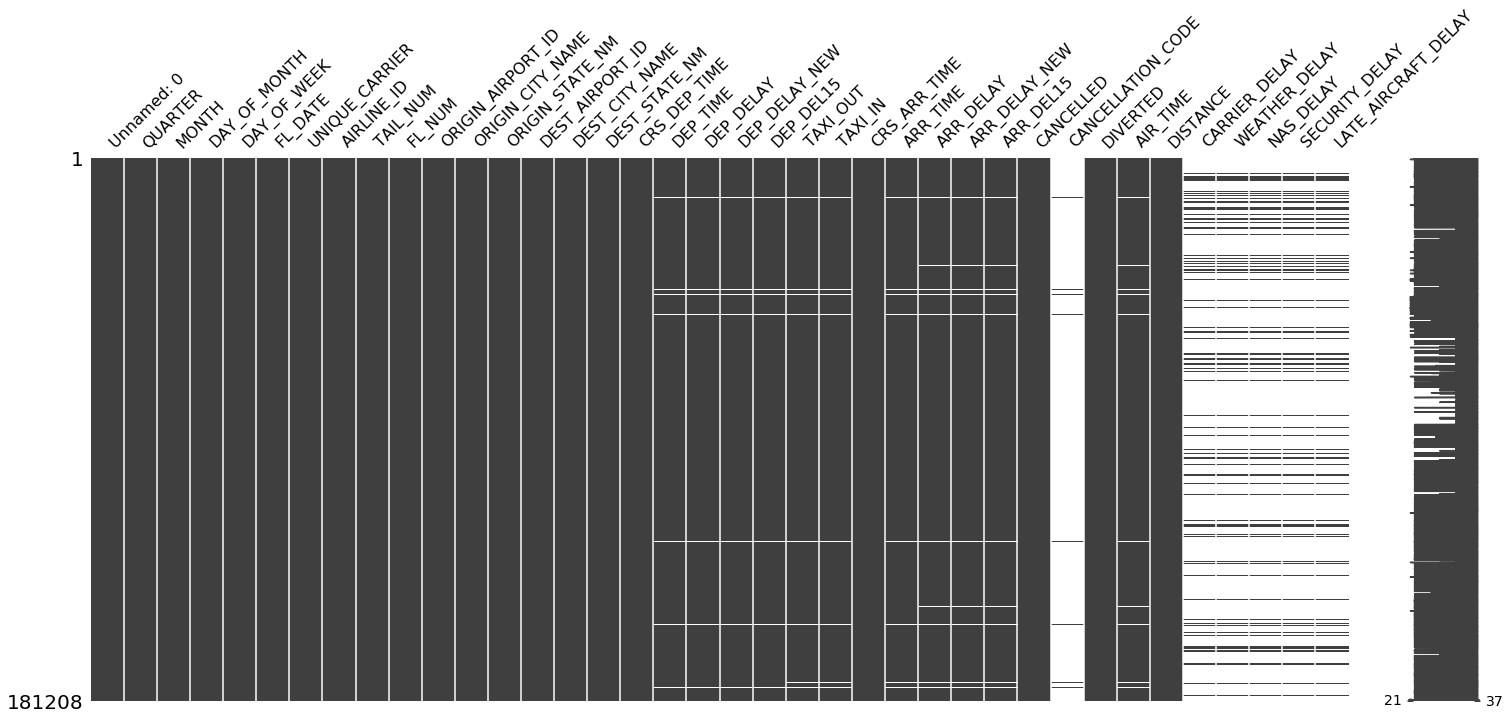

In [4]:
#This code was adopted from your notebooks
mn.matrix(df_dfw.sort_values(by=["Unnamed: 0",]))

#The code is from the class code, we modified the sorted valus inside the bracket.

After visualizing the missing data, according to the plot above, there exist a large number of missing value in the feature "Cancellation_Code". Since cancelled flights is not our interest, we eliminate all cancelled flight data, where the feature CANCELLED is recorded as "0."

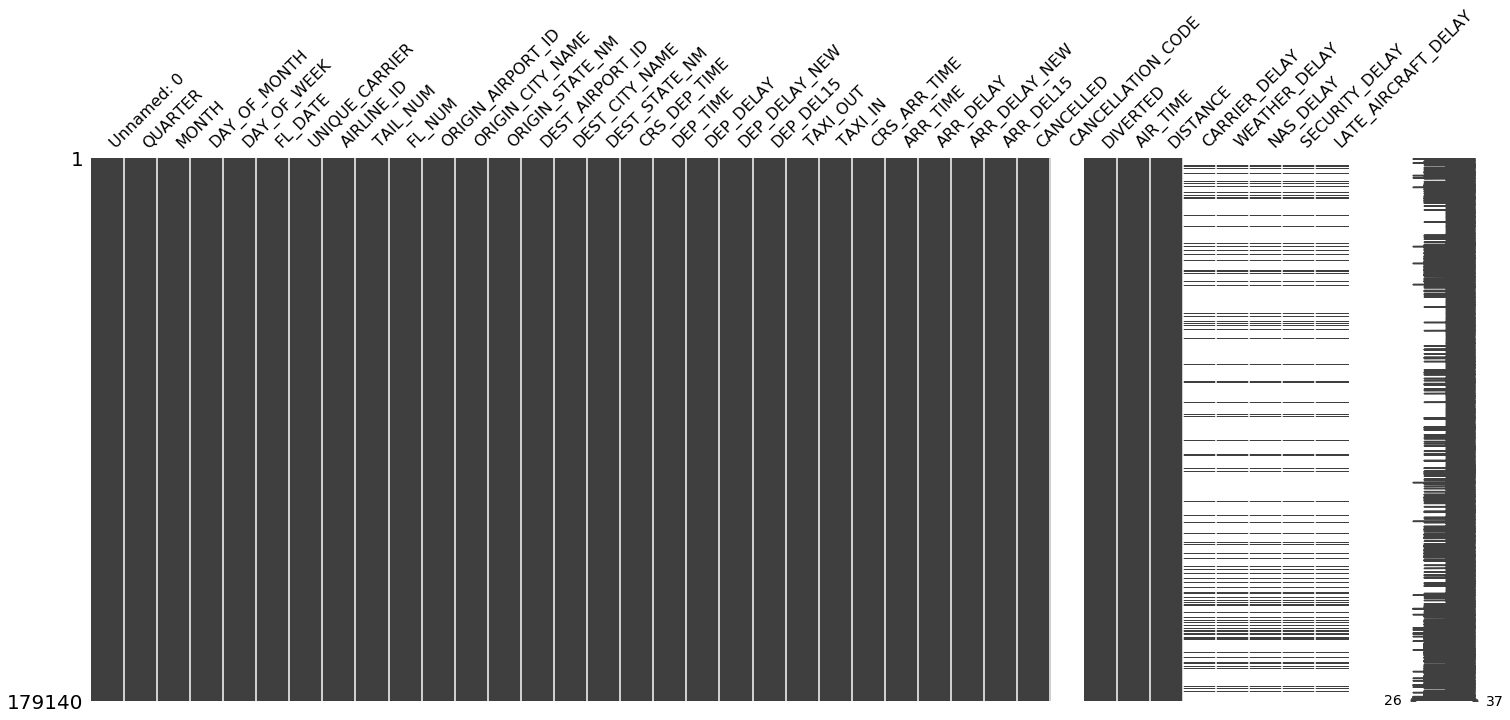

In [5]:
#This code was adopted from your notebooks
df_dfw_uncancelled = df_dfw[df.CANCELLED != 1]
mn.matrix(df_dfw_uncancelled.sort_values(by=["Unnamed: 0",]))

Although most columns seem to have no missing value, there are still a couple features contain small number of missing data. In order to complete this cleaning process, we sum up the number of the missing value under each column

In [6]:
print(df_dfw_uncancelled.isnull().sum())

Unnamed: 0                  0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
UNIQUE_CARRIER              0
AIRLINE_ID                  0
TAIL_NUM                    0
FL_NUM                      0
ORIGIN_AIRPORT_ID           0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_NM             0
DEST_AIRPORT_ID             0
DEST_CITY_NAME              0
DEST_STATE_NM               0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
DEP_DELAY_NEW               0
DEP_DEL15                   0
TAXI_OUT                    0
TAXI_IN                    34
CRS_ARR_TIME                0
ARR_TIME                   34
ARR_DELAY                 532
ARR_DELAY_NEW             532
ARR_DEL15                 532
CANCELLED                   0
CANCELLATION_CODE      179140
DIVERTED                    0
AIR_TIME                  532
DISTANCE                    0
CARRIER_DE

STEP 1)
There are 34 missing value under the "TAXI_IN" and "ARR_TIME" column.  Since ARRIVAL_TIME should not have any association with TAXI_IN time, these missing value are more than likely mistaken, such as loss of information while collecting. Since 34 observation is only a tiny fraction of a dataset that is nearly 180K count, these observations are decided to be eliminated. (Method = Elimination)

In [7]:
# Clear these 34 missing value under TAXI_IN column
df_dfw_uncancelled_1 = df_dfw_uncancelled[df_dfw_uncancelled['TAXI_IN'].notnull()]
print(df_dfw_uncancelled_1.isnull().sum())

Unnamed: 0                  0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
UNIQUE_CARRIER              0
AIRLINE_ID                  0
TAIL_NUM                    0
FL_NUM                      0
ORIGIN_AIRPORT_ID           0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_NM             0
DEST_AIRPORT_ID             0
DEST_CITY_NAME              0
DEST_STATE_NM               0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
DEP_DELAY_NEW               0
DEP_DEL15                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                 498
ARR_DELAY_NEW             498
ARR_DEL15                 498
CANCELLED                   0
CANCELLATION_CODE      179106
DIVERTED                    0
AIR_TIME                  498
DISTANCE                    0
CARRIER_DE

STEP 2) There were 498 observations that have missing value under "ARR_DELAY", "ARR_DELAY_NEW","ARR_DEL15", and "AIR_TIME"(ARR_DELAY is associated with other three varialbes. Thus, missing value on "ARR_DELAY" would cause missing on other columns). There were not mistakes. The reason of missing might be the lossing of information. 498 is less than 0.3% of the total observation. Thus, we decided to eliminate those missing value observations. (Method = Elimination)

In [8]:
# Clear these 498 missing value under ARR_DELAY column
df_dfw_uncancelled_2 = df_dfw_uncancelled_1[df_dfw_uncancelled_1['ARR_DELAY'].notnull()]
print(df_dfw_uncancelled_2.isnull().sum())

Unnamed: 0                  0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
UNIQUE_CARRIER              0
AIRLINE_ID                  0
TAIL_NUM                    0
FL_NUM                      0
ORIGIN_AIRPORT_ID           0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_NM             0
DEST_AIRPORT_ID             0
DEST_CITY_NAME              0
DEST_STATE_NM               0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
DEP_DELAY_NEW               0
DEP_DEL15                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
ARR_DELAY_NEW               0
ARR_DEL15                   0
CANCELLED                   0
CANCELLATION_CODE      178608
DIVERTED                    0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DE

STEP 3) Since there is no cancelled flight information concerned with the purpose of this prediction, the CANCELLATION_CODE feature is determined to be completely eliminated.

STEP 4) Due to the industry practice of 15 minutes of more delay is considered as flight delay, the majority of data are empty under columns CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, and LATE_AIRCRAFT_DELAY. These data are determined to be left alone, neither to be imputed nor eliminated.

In [9]:
# Check how many flights were not consider as delay (delay mins <=15)
df_dfw_uncancelled_2[df_dfw_uncancelled_2['ARR_DEL15'] ==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149363 entries, 1 to 984915
Data columns (total 38 columns):
Unnamed: 0             149363 non-null int64
QUARTER                149363 non-null int64
MONTH                  149363 non-null int64
DAY_OF_MONTH           149363 non-null int64
DAY_OF_WEEK            149363 non-null int64
FL_DATE                149363 non-null datetime64[ns]
UNIQUE_CARRIER         149363 non-null object
AIRLINE_ID             149363 non-null int64
TAIL_NUM               149363 non-null object
FL_NUM                 149363 non-null int64
ORIGIN_AIRPORT_ID      149363 non-null int64
ORIGIN_CITY_NAME       149363 non-null object
ORIGIN_STATE_NM        149363 non-null object
DEST_AIRPORT_ID        149363 non-null int64
DEST_CITY_NAME         149363 non-null object
DEST_STATE_NM          149363 non-null object
CRS_DEP_TIME           149363 non-null int64
DEP_TIME               149363 non-null float64
DEP_DELAY              149363 non-null float64
DEP_DELAY_NEW  

Thus, we dropped the useless column "CANCELLATION_CODE". 

In [10]:
#df_dfw_uncancelled_2 = df_dfw_uncancelled_2.drop(['CANCELLATION_CODE'])
df_dfw_uncancelled = df_dfw_uncancelled_2
print(df_dfw_uncancelled.isnull().sum())

# The new df_dfw is the df_dfw_uncancelled
# df_dfw is mainly used on Data Visulazation
# df_df_uncancelled is mainly used on t-SNE
df_dfw = df_dfw_uncancelled

Unnamed: 0                  0
QUARTER                     0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
FL_DATE                     0
UNIQUE_CARRIER              0
AIRLINE_ID                  0
TAIL_NUM                    0
FL_NUM                      0
ORIGIN_AIRPORT_ID           0
ORIGIN_CITY_NAME            0
ORIGIN_STATE_NM             0
DEST_AIRPORT_ID             0
DEST_CITY_NAME              0
DEST_STATE_NM               0
CRS_DEP_TIME                0
DEP_TIME                    0
DEP_DELAY                   0
DEP_DELAY_NEW               0
DEP_DEL15                   0
TAXI_OUT                    0
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME                    0
ARR_DELAY                   0
ARR_DELAY_NEW               0
ARR_DEL15                   0
CANCELLED                   0
CANCELLATION_CODE      178608
DIVERTED                    0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DE

In [11]:
#Stat info for the cleared dataset based on different Carrier
stat = df_dfw['ARR_DELAY'].groupby(df['UNIQUE_CARRIER']).describe()
stat = stat.sort_values('count')
stat

,count,mean,std,min,25%,50%,75%,max
UNIQUE_CARRIER,,,,,,,,
F9,622.0,7.297428,46.234820,-41.0,-16.0,-6.0,11.0,333.0
B6,632.0,-1.186709,36.864509,-53.0,-24.0,-9.0,10.0,259.0
AS,1492.0,-2.800268,23.886560,-48.0,-15.0,-6.0,4.0,248.0
OO,4568.0,6.897329,51.154319,-52.0,-15.0,-5.0,9.0,1381.0
DL,5583.0,-2.590005,38.016413,-57.0,-19.0,-10.0,1.0,794.0
UA,6308.0,-0.784084,41.048931,-54.0,-20.0,-11.0,2.0,1077.0
NK,7843.0,7.772664,74.227098,-61.0,-17.0,-8.0,8.0,1619.0
EV,14053.0,11.960649,68.379970,-52.0,-15.0,-6.0,8.0,1381.0
AA,137507.0,3.203204,55.679591,-71.0,-15.0,-7.0,5.0,1944.0


According to the table above,  

*   American Airlines (AA) has the most flights arriving to Dallas, which makes sense since DFW is their headquarter
*   Frontier (F9) doesn't have a lot of flights coming to Dallas, but when they do they are most of the time late.
*   ExpressJet (EV) has the highest average delay of 11.96 min/aircraft
*  Spirit Airlines (NK) has the highest spread of arrival delay with standard deviation of 74.22



In [12]:
# Calculate the ratio of operated flight
cancelled = df_dfw[df_dfw['CANCELLED'] == 1].count()['CANCELLED']
scheduled = df_dfw['CANCELLED'].count()
operated = scheduled - cancelled
ratio_oper = operated / scheduled * 100
ratio_cancel = 100 - ratio_oper

print("Cancelled flights: %s" %(cancelled))
print("Operated flights: %s" %(operated))
print("Operation ratio: %s " %(ratio_oper))
print("Cancellation ratio: %s " %(ratio_cancel))


Cancelled flights: 0
Operated flights: 178608
Operation ratio: 100.0 
Cancellation ratio: 0.0 


Out of those incoming flights to DFW in 2017, 1.14% were cancelled. (Note: Google Colab shows "Operation ratio : 0," whereas our local device show as 98.85%.)

# 3.Data Visualization

MONTH
1     15001
2     13659
3     15343
4     13903
5     15279
6     15132
7     15711
8     15679
9     14347
10    15474
11    14336
12    14744
Name: QUARTER, dtype: int64

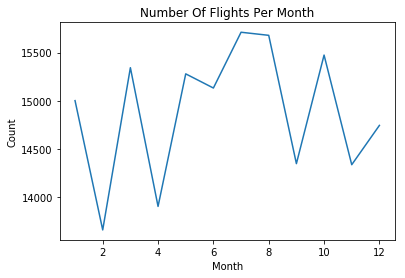

In [13]:
mn=df_dfw.groupby('MONTH')['QUARTER'].count()
plt.plot(mn)
plt.title('Number Of Flights Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
mn

We then plotted a graph of the amount of uncancelled DFW-arrived flights for each month during 2017. As we could see, the peak of last year is the August.  What is more, we could see the up tread starts on Feb, May, Sep, and Nov, which mach up the 4 big breaks for most college students (spring, summer, fall, and winter). 



Text(0,0.5,'Frequency')

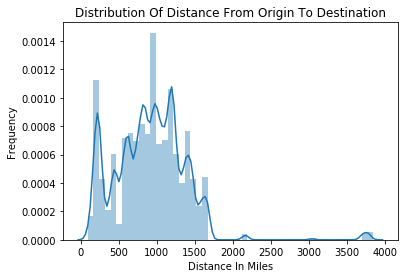

In [14]:
sns.distplot(df_dfw['DISTANCE'])
plt.title('Distribution Of Distance From Origin To Destination')
plt.xlabel('Distance In Miles')
plt.ylabel('Frequency')



* We can see that the mean is around 1000 (911 to be exact)
* Also it's a multimodal distribution

125.63686397025889

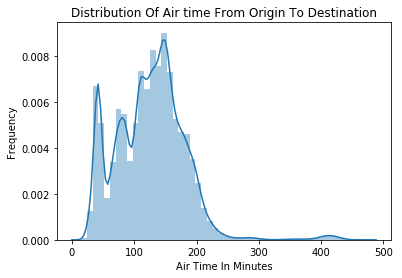

In [15]:
sns.distplot(df_dfw['AIR_TIME'])
plt.title('Distribution Of Air time From Origin To Destination')
plt.xlabel('Air Time In Minutes')
plt.ylabel('Frequency')
df_dfw['AIR_TIME'].mean()

* We can see the average air time is 125
* This is also a multi-modal distribution

3.814045283525934

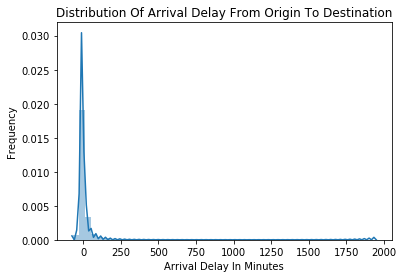

In [16]:
sns.distplot(df_dfw['ARR_DELAY'])
plt.title('Distribution Of Arrival Delay From Origin To Destination')
plt.xlabel('Arrival Delay In Minutes')
plt.ylabel('Frequency')
df_dfw['ARR_DELAY'].mean()

* We have the average arrival delay is 1.97 mins
* this is a long tailed distribution with alot of outliers

[Text(0.5,0,'delay_time '),
 Text(0.5,1,'Arrival Delay(Blue) VS Departure Delay(Red)')]

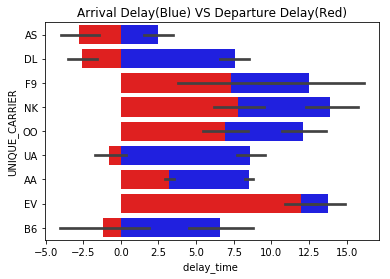

In [13]:
#/this code was adopted from the lectures
ax = sns.barplot(x="DEP_DELAY", y="UNIQUE_CARRIER", data=df_dfw, color="b")
ax = sns.barplot(x="ARR_DELAY", y="UNIQUE_CARRIER", data=df_dfw, color="r")
ax.set(xlabel="delay_time ", title='Arrival Delay(Blue) VS Departure Delay(Red)')

On this figure, we can see that generally the time of departure delay is more than the time of the arrival delay. It is really interested. It could be the evidence that if the flight departed late, the flight captin will adjust the speed to make up for the departure delay.

For example:
* UA Departs late alot but arrives in good time
* EV Departs the latest but still arrives late (it also has the wrost arrival delay time)
* AS looks really good, departs late(ish) but arrives early

**speaking of speed, let's make a new column and visualize different speeds of the airlines**

[Text(0,0.5,'Speed in Miles/HR'),
 Text(0.5,1,'Violin Plot Of the Speed of each Carrier')]

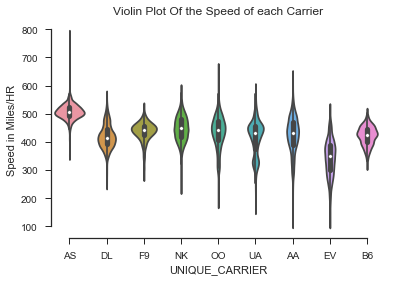

In [18]:
#/this code was adopted from the lectures
#try to see the airline speed
df_dfw['speed'] = 60*df_dfw['DISTANCE']/df_dfw['AIR_TIME']
ax = sns.violinplot(y="speed", x="UNIQUE_CARRIER", data=df_dfw );
sns.despine(trim=True)
ax.set(ylabel='Speed in Miles/HR',title='Violin Plot Of the Speed of each Carrier')


On this violin plot the median speed for all carrier is around 400.
* ExpressJet airline is the slowest and it makes sense why they also arrive late
* Alaska airline is the fastest
* We can also see that United Airlines has a multi-modal distribution

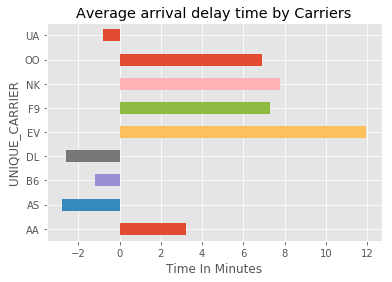

In [14]:
plt.style.use('ggplot')

df_grouped = df_dfw.groupby(by=['UNIQUE_CARRIER'])
delay_rate = df_grouped.ARR_DELAY.mean()
ax = delay_rate.plot(kind='barh')
plt.title('Average arrival delay time by Carriers')
plt.xlabel('Time In Minutes')
plt.show()

This plot shows the average of flight delay to the total flight 

* EV has the highest average delay by carrier
* AS has the lowest average delay by carrier
* AA has 3 min average delay

**Fly Alaska and Delta, they are always on average early!**

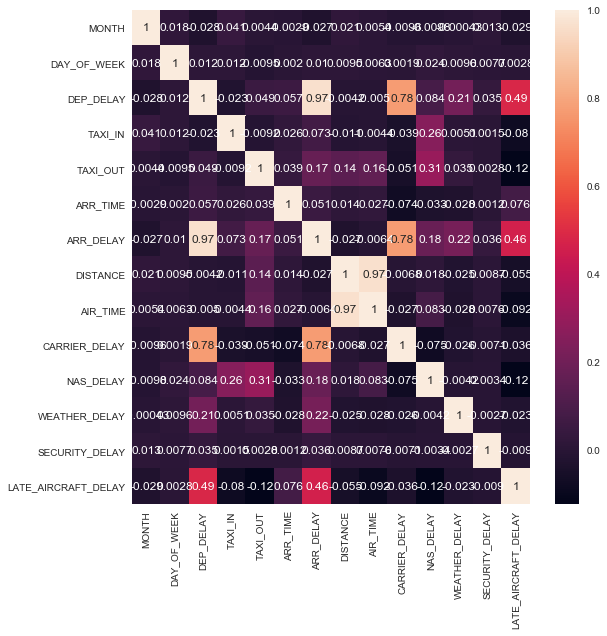

In [20]:
#This cosde was adopted from your Lectures
# plot the correlation matrix using seaborn
cmap = sns.set(style="darkgrid") 

vars_to_use = ['MONTH', 'DAY_OF_WEEK', 'DEP_DELAY',
              'TAXI_IN', 'TAXI_OUT', 'ARR_TIME', 'ARR_DELAY',
              'DISTANCE', 'AIR_TIME', 'CARRIER_DELAY', 'NAS_DELAY',
              'WEATHER_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

f,ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_dfw[vars_to_use].corr(), cmap=cmap, annot=True)

f.tight_layout()

* The ARR_DELAY value is dependent on CARRIER_DELAY, NAS_DELAY, WEATHER_DELAY, SECURITY_DELAY, and LATE-AIRCRAFT_DELAY. These values are related to ARR_DELAY.
* We can see that arrival delay is very corelated with Carrier Delay (0.78) and Departure Delay (0.97)
* Security delay doesn't significantly affect the arrival delay as other reasons does.
* Departue Delay is highly corelated with Arrival delay(0.98) which makes sense, if you leave late you will most likely arrive late!
 

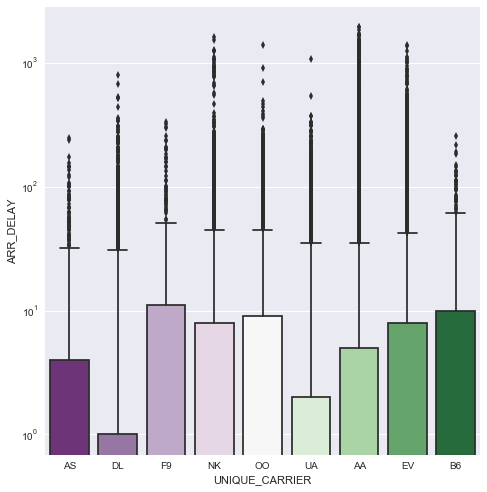

In [21]:
#This code was adopted from your lectures
g=sns.factorplot(x='UNIQUE_CARRIER',y='ARR_DELAY',data=df_dfw, 
               kind='box', # other options: violin, bar, box, and others 
               palette='PRGn',
               size=7,ci=95)
g.fig.get_axes()[0].set_yscale('log')
plt.show()

* We can see that DL is the most consistent
* F9 has the most spread

MONTH
1     15001
2     13659
3     15343
4     13903
5     15279
6     15132
7     15711
8     15679
9     14347
10    15474
11    14336
12    14744
Name: FL_DATE, dtype: int64

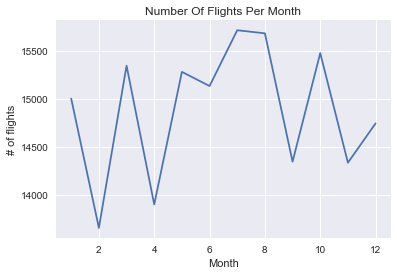

In [22]:

#let's see the distribtion of flights over the months

df_grouped=df_dfw.groupby('MONTH')
plt.plot(df_grouped['FL_DATE'].count())
plt.xlabel('Month')
plt.ylabel('# of flights')
plt.title('Number Of Flights Per Month')
df_grouped['FL_DATE'].count()

From the above figure we can see that
* May is the slowest month in airline traffic
* August is the busiest month in airline traffic

Text(0,0.5,'# of flights')

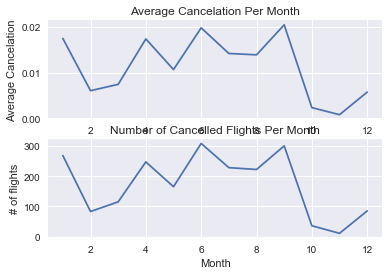

In [23]:
#let's have a look at the canceled flights

#we dropped the cancelled flight but i will bring it again to do some visualizations

df = df[df['DEST_CITY_NAME']=='Dallas/Fort Worth, TX']


cancel_month =  df.groupby(['MONTH'])['CANCELLED']
plt.subplot(2,1,1)
plt.plot(cancel_month.sum()/cancel_month.count())
plt.title("Average Cancelation Per Month")
plt.xlabel("Month")
plt.ylabel("Average Cancelation")
plt.subplot(2,1,2)
plt.plot(cancel_month.sum())
plt.title('Number of Cancelled Flights Per Month')
plt.xlabel('Month')
plt.ylabel('# of flights')

* on the top figure, we can see that September is the highest percentage in cancelation over the year
* on the bottom figure, we can see that June has the highest number of cancelled flights(which is the second bussiest month from the plot above)

Text(0,0.5,'Average Arrival Delay In Minutes')

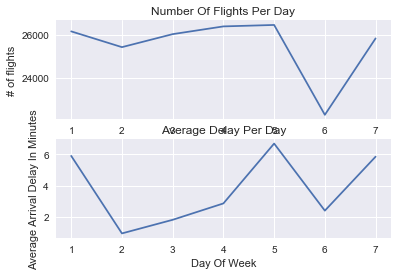

In [24]:
#let's see the distribtion of flights over the days
delay_day =  df.groupby(['DAY_OF_WEEK'])['ARR_DELAY']
plt.subplot(2,1,1)
plt.plot(delay_day.count())
plt.title('Number Of Flights Per Day')
plt.xlabel('Day Of Week')
plt.ylabel('# of flights')
plt.subplot(2,1,2)
plt.plot(delay_day.mean())
plt.title('Average Delay Per Day')
plt.xlabel('Day Of Week')
plt.ylabel('Average Arrival Delay In Minutes')

From the above plot, 
* we can see that day 5 (Friday) is the bussiest day of the week and also has the highest average delay time(people coming to spend the weekend in Dallas)
* Peak of delay is on day 7 (Sunday where people come back to Dallas to get ready for work on Monday)


## Reasons Of Delay

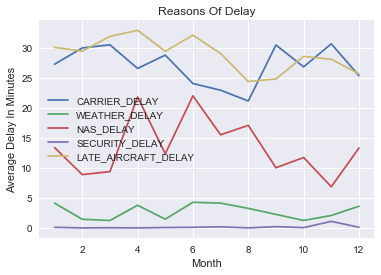

In [25]:
delay_reason=df.groupby('MONTH')[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].mean()
plt.plot(delay_reason)
plt.title('Reasons Of Delay')
plt.xlabel('Month')
plt.ylabel('Average Delay In Minutes')
plt.legend(delay_reason)
plt.show()

* We can see security reasons usually don't cause a delay
* April has the peak of National Air System delays and Late aircraft delay
* Carrier Delay and Late air craft deay are the 2 main reasons in delays
* Overall, April has the highest total delay (sum of this 5 categories)
* Compare to the Number of Flight Per Month plot, we found there is an inverse relationship between the number of flight and the average delay time by carrier. It may tell us that flight carriers tend to make up the delay when the amount of flight is increasing.

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
UNIQUE_CARRIER,,,,,
AA,25.328920,3.303314,14.192525,0.157587,27.956604
AS,19.215116,2.284884,14.860465,0.453488,6.970930
B6,17.473684,1.105263,20.804511,0.165414,12.676692
DL,21.435461,10.530496,14.899291,0.000000,15.226950
EV,42.493502,0.000000,7.973656,0.000000,45.031612
F9,14.770370,1.029630,22.718519,0.000000,29.755556
NK,18.486537,1.334377,36.983093,0.366938,25.395742
OO,24.510383,3.655738,11.493989,0.012022,32.056831
UA,20.072874,3.981781,15.081984,0.000000,28.169028


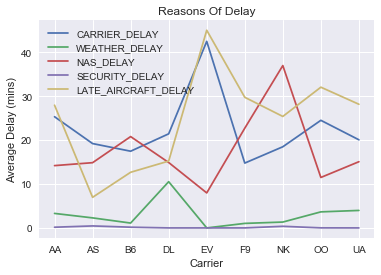

In [26]:
  #Reasone for delay by aircraft
  
delay_carrier=df_dfw.groupby('UNIQUE_CARRIER')[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].mean()
plt.plot(delay_carrier, label = 'AA')
#how to show the color bar?
plt.title('Reasons Of Delay')
plt.xlabel('Carrier')
plt.ylabel('Average Delay (mins)')
plt.legend(delay_carrier)
delay_carrier

* EV has a big problem with carrier and aircraft delay
* NK has a problem with NAS delay
* AA delays is between carrier and late air craft

In [27]:
#plot top 10 
print('Number of unique tail numbers is %s'% df_dfw['TAIL_NUM'].nunique())

#get the top 10 late aircraft delays and examine them
tail_num_delay = df_dfw.groupby('TAIL_NUM')[['ARR_DELAY','LATE_AIRCRAFT_DELAY']].sum().sort_values(by='ARR_DELAY',ascending=False).head(10)
tail_num_delay['perc_aircraft_delay']=tail_num_delay['LATE_AIRCRAFT_DELAY']/tail_num_delay['ARR_DELAY']
tail_num_delay
#plt.hist(tail_num_delay['ARR_DELAY'])

Number of unique tail numbers is 2681


,ARR_DELAY,LATE_AIRCRAFT_DELAY,perc_aircraft_delay
TAIL_NUM,,,
N612QX,9573.0,5119.0,0.534733
N616QX,9562.0,7219.0,0.754968
N615QX,8874.0,6529.0,0.735745
N611QX,8612.0,5522.0,0.641198
N608QX,8243.0,6002.0,0.728133
N879AS,8147.0,6085.0,0.746901
N614QX,8126.0,6471.0,0.796333
N902EV,7882.0,6323.0,0.802208
N4YBAA,7634.0,3874.0,0.507467


**We can make really pretty visualization depending on the specific aircraft but that's will be enough for the lab
(maybe will do it if we get paid $50k for the analysis :)   ) **

# 4. t-SNE 

t-SNE, full name as t-distributed Stochastic Neighbor Embedding, is a non-linear dimension reduction method using conditonal probability to convert the similarity between data points. The distance from the high dimension to the low dimension is Gaussian distributed.

Suppose x_i = ith object in high dimension, y_i = ith object in low dimension

The high dimension joint probablity is calculated by:

$$p_{j|i} = \frac{exp(-||x_i - x_j||^{2}/2\sigma_i^2)}{\sum_{k \neq i}exp(-||x_i - x_j||^{2}/2\sigma_i^2)}$$

The low dimension joint probablity is calculated by:
$$q_{j|i} = \frac{exp(-||x_i - x_j||^{2})}{\sum_{k \neq i}exp(-||x_i - x_j||^{2})}$$

And the cost function is calculated based on "the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data":

$$C = \sum_{i}KL(P_i||Q_i) = \sum_{i} \sum_{j} p_{j|i}log\frac{p_{j|i}}{q_{j|i}}$$

Because KL is asymmetric, the local structure is highly preseved. Thus, 
1. "Large cost for representing near points in high dimension by widely spreading data points in low dimension"
2. "Small cost for reprsenting widely separated data points in high dimension by nearly spreading datapoints in low dimension"

The sigma is associated with perplexity (numer of closed neighbors each point has) and is found by binary search.


References:

http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

http://www.datakit.cn/blog/2017/02/05/t_sne_full.html

https://www.youtube.com/watch?v=ohQXphVSEQM

There are 6 variables important to the analysis: "UNIQUE_CARRER" (Flight Cariier), "ORIGIN_CITY_NAME" (Departure City), "DISTANCE" (Flight distance), "DAY_OF_WEEK" (Weekdays), "DAY_OF_MONTH" (Day in that month), "DEP_DEL15" (Depature delay/on-time), and "ARR_DEL15" (Arrival delay/on-time).

Since "UNIQUE_CARRIER" and "ORIGIN_CITY_NAME" are nominal data, we converted them to dummy variables. 

We used the python module SKlearn to do the dimension reduction (t-SNE), and then used matplotlib's scatter to scatter plot the 2D data. In order to increase the running speed for the code, we lowered the iteration time to 500 (from a 1000). Also, we increased the perplexity to 40

Since the dataset is quite large, we broke down the data set by month. On this part, we focus on the month Jan.

Unfortunately, the result of t-SNE may be different for different running. 

In [28]:
# Convert important categorical varialbes to dummy variables and combine them
df_dfw_dummy_carrier = pd.get_dummies(df_dfw_uncancelled['UNIQUE_CARRIER'])
df_dfw_dummy_origin = pd.get_dummies(df_dfw_uncancelled['ORIGIN_CITY_NAME'])
df3 = pd.concat([df_dfw_dummy_origin, df_dfw_dummy_carrier], axis=1)
df_dfw_uncancelled = pd.concat([df_dfw_uncancelled, df3], axis=1) # Only run it once
df_dfw_uncancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178608 entries, 1 to 984915
Columns: 179 entries, Unnamed: 0 to UA
dtypes: datetime64[ns](1), float64(17), int64(14), object(7), uint8(140)
memory usage: 83.4+ MB


In [29]:
# Pick the data that Month is Jan
df_dfw1 = df_dfw_uncancelled[df_dfw_uncancelled["MONTH"] == 1]

# Select useful columns
df_dfw1_1 = df_dfw1[df_dfw1.columns[39:178]]
df_dfw1_2 = df_dfw1[['DISTANCE', 'DAY_OF_WEEK', 'DAY_OF_MONTH', 'DEP_DEL15', 'ARR_DEL15']]

# Merge both selections
df_dfw1 = pd.concat([df_dfw1_1, df_dfw1_2], axis=1)

# Convert the dataframe to array
df_dfw1_array = df_dfw1
df_dfw1_array = df_dfw1_array.values # Convert to array
df_dfw1_array

#Dimension Reduction for T-SNE
from sklearn.manifold import TSNE
X = df_dfw1_array
X_embedded_1 = TSNE(n_components=2, perplexity=40.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=500, 
                    n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', 
                    verbose=0, random_state=None, method='barnes_hut', angle=0.5).fit_transform(X)

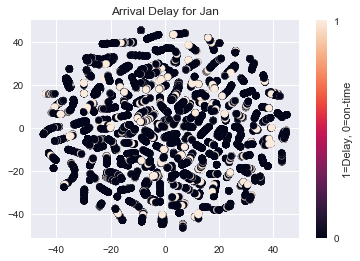

In [30]:
# Scatter the plot 
x1_data = X_embedded_1[:, 0] # Get the first column data
y1_data = X_embedded_1[:, 1] # Get the second column data
plt.scatter(x1_data, y1_data, c = df_dfw1.values[:,-1]) # Scatter plot the 2D data set, c = the number of color we want to specify based on the level of the variable
plt.colorbar(ticks=range(8)).ax.set_ylabel('1=Delay, 0=on-time')
plt.title("Arrival Delay for Jan")
plt.show()

From the plot, we could not see any obvious pattern/area of flights delay (which makes a lot sense since DFW is the NO.10 airport on the flight punctuality). However, the plot has a area that has highly concentrated data which the flight arrived on-time (the area may be different since t-SNE may not generate the same result each time). We took a close look at it and explored this area/cluster features.

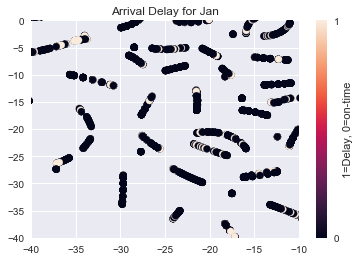

In [34]:
# Zoom in the arrival delay part
plt.scatter(x1_data, y1_data, c = df_dfw1.values[:,-1])
plt.xlim(-40,-10) #change the x coordinate
plt.ylim(-40, 0) #change the y coordinate
plt.colorbar(ticks=range(8)).ax.set_ylabel('1=Delay, 0=on-time')
plt.title("Arrival Delay for Jan")
plt.show()



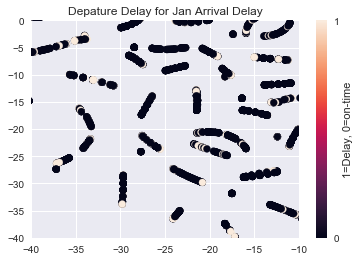

In [35]:
# Depature Delay feature of current zoom in plot
plt.scatter(x1_data, y1_data, c = df_dfw1.values[:,-2])
plt.xlim(-40,-10) #change the x coordinate
plt.ylim(-40, 0) #change the y coordinate
plt.colorbar(ticks=range(8)).ax.set_ylabel('1=Delay, 0=on-time')
plt.title("Depature Delay for Jan Arrival Delay")
plt.show()

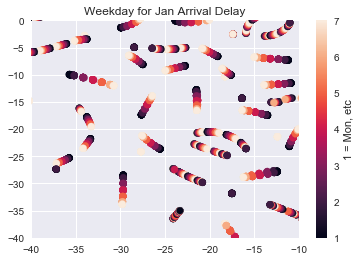

In [36]:
# Weekday feature for current zoom in plot
plt.scatter(x1_data, y1_data, c = df_dfw1.values[:,-4])
plt.xlim(-40,-10) #change the x coordinate
plt.ylim(-40, 0) #change the y coordinate
plt.colorbar(ticks=range(8)).ax.set_ylabel('1 = Mon, etc')
plt.title("Weekday for Jan Arrival Delay")
plt.show()

As we could see, there only obvious feature is depature delay.

# 5. Progressive Conclusion

* We found that American Airlines is definitely the leading enterprise at DFW airport.
* We found that this data set is abundant and fruitful for visualizations, and it is likely to produce predictive result.
* We found that this data set may not be good enough for clustering analysis using T-SNE, which failed to cluster. However, other method may be applied successfully.